# Step by Step to AUC

some intro text...

The data to be classified.
$k=10$ observables $x_i$ with $x_i \in X [0,10]$

In [31]:
x = [0.1, 1.1, 2.6,3.3,4.9,5.2,6.5,7.3,8.5,9.3]

Define a binary classifier function which classifies the data upon a given threshold $\theta$ in a binary class $[1,0]$.

In [32]:
def classifier(x, theta):
    if x < theta:
        return 0
    elif x >= theta:
        return 1

Let's classify each observable in $x$ with threshold $\theta = 5$.

The binary class the data belongs to (ground truth)

In [33]:
y = [0,0,0,0,0,1,1,1,1,1]

We expect that all numbers $x_i < 5$ are classified to $0$ and all $x_i >= 5$ to $1$.

In [34]:
yhat_5 = []
for i in x:
    yhat_5.append(classifier(i,5))
print(yhat_5)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


With $\theta = 0$ and $\theta = 10$ we expect that all $x_i$ are classified as $1$ and $0$ respectively.

In [35]:
yhat_0 = []
for i in x:
    yhat_0.append(classifier(i,0))
print(yhat_0)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [36]:
yhat_10 = []
for i in x:
    yhat_10.append(classifier(i,10))
print(yhat_10)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Let's now calculate the confusion matrix for $\theta = 5$.

In [37]:
TP = 0
FP = 0
FN = 0
TN = 0
for i,j in zip(y,yhat_5):
        if i == 1 and j == 1:
            TP += 1
        elif i == 0 and j == 0:
            TN += 1
        elif i == 1 and j == 0:
            FN += 1
        elif i == 0 and j == 1:
            FP +=1
print(TP, FP, FN, TN)

5 0 0 5


We put the confusion matrix in a function:

In [38]:
def true_posNeg_rate(y, yhat):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i,j in zip(y,yhat):
        if i==j and i == 1 and j == 1:
            TP += 1
        elif i == j and i == 0 and j == 0:
            TN += 1
        elif i == 1 and j == 0:
            FN += 1
        elif i == 0 and j == 1:
            FP +=1
            
    return TP, FP, FN, TN
TP, FP, FN, TN = true_posNeg_rate(y,yhat_5)
print(TP, FP, FN, TN)

5 0 0 5


We define functions for the four most generic evaluation metrics.

In [39]:
def accuracy(TP, FP, FN, TN):
    return((TP+TN)/(TP+FP+FN+TN))
acc_5 = accuracy(TP, FP, FN, TN)
print(acc_5)

1.0


In [40]:
def sensitivity(TP, FN):
    return(TP/(TP+FN))
TPR_5 = sensitivity(TP, FN)
print(TPR_5)

1.0


In [41]:
def specificity(TN, FP):
    return(TN/(TN+FP))
TNR_5 = specificity(TN, FP)
print(TNR_5)

1.0


In [42]:
def precision(TP, FP):
    return(TP/(TP+FP))
PPV_5 = precision(TP, FP)
print(PPV_5)

1.0


We can see, that with $\theta = 5$, our binary classifier is perfect.

Let's now evaluate different $\theta$s to plot the ROC curve.  
Therefore we first define a range from $0$ to $10$ of thresholds:

In [43]:
theta = range(0,11,1)
[t for t in theta]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

For each threshold value $\theta_i \in \theta$ we calculate $\hat{y}_{\theta_i}$. The true positive rate and false positive rate is then calculated for each element of $\hat{y}$.

In [44]:
# for theta between 0,10
    # calculate yhat
    # calculate TPR
    # calculate FPR
# draw plot of [FPR, TPR] for all thetas
theta = range(0,10,1)
TPR = []
FPR = []
for t in theta:
    yhat = []
    for i in x:
        yhat.append(classifier(i,t))
    
    TP, FP, FN, TN = true_posNeg_rate(y,yhat)
    
    TPR.append(sensitivity(TP, FN))
    FPR.append(1-specificity(TN, FP))

print(TPR)
print(FPR)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.6, 0.4, 0.2]
[1.0, 0.8, 0.6, 0.4, 0.19999999999999996, 0.0, 0.0, 0.0, 0.0, 0.0]


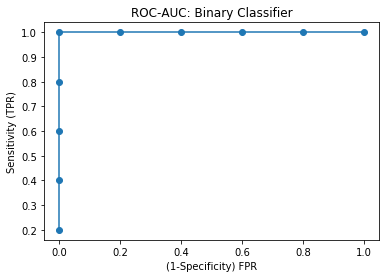

In [45]:
import matplotlib.pyplot as plt
plt.plot(FPR, TPR, 'o-')
plt.ylabel("Sensitivity (TPR)")
plt.xlabel("(1-Specificity) FPR")
plt.title('ROC-AUC: Binary Classifier')
plt.show()

## Conclusion
The binary classifier was tested with $i=10$ different parameters $\theta_i \in [0,10]$. For every $\theta_i$ we calculated the sensitivity and false-positive rate. Those plotted results in the ROC-AUC curve. The AUC is visiaually observed about 1 which indicates, that with our classifier is quite good in discriminate the data in $x$.  
Depending on the objective function, the final threshold is chosen. In our case we could choose the threshold value with the maximal distance to the diagonal $AUC=0.5$ which is as shown in the beginning $\theta = 5$.